In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

In [108]:
duration = 5
sample_rate = 4100
num_samples = int(duration * sample_rate)

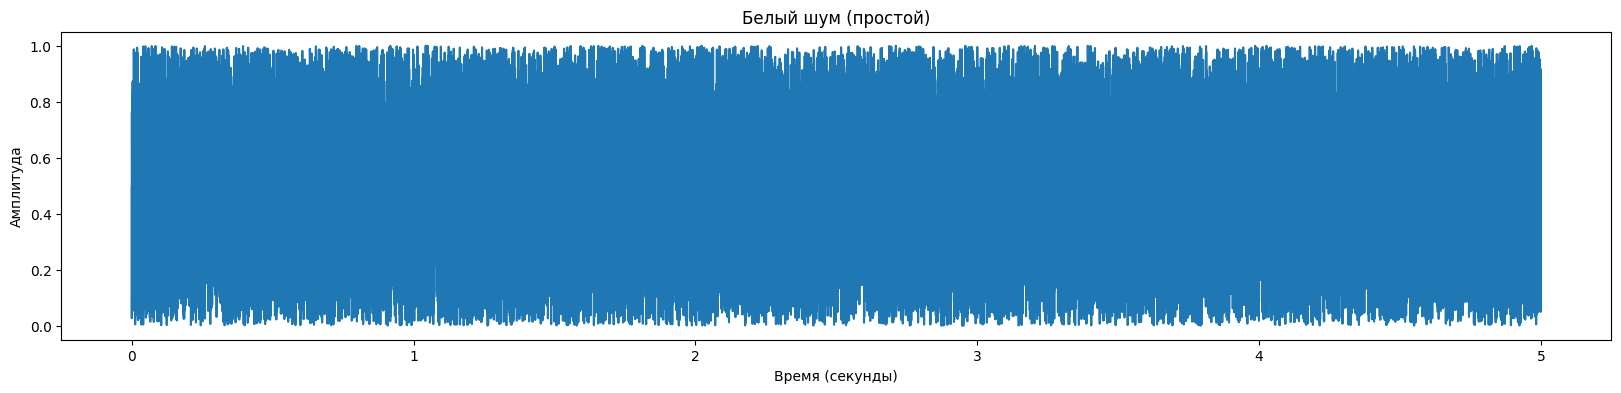

In [9]:
white_noise_simple = np.random.random(num_samples)
time_axis = np.linspace(0, duration, len(white_noise_simple)) 

plt.figure(figsize=(20, 4))  
plt.plot(time_axis, white_noise_simple)
plt.title('Белый шум (простой)')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')
plt.show()

In [109]:
sd.play(white_noise_simple, sample_rate)
sd.wait()

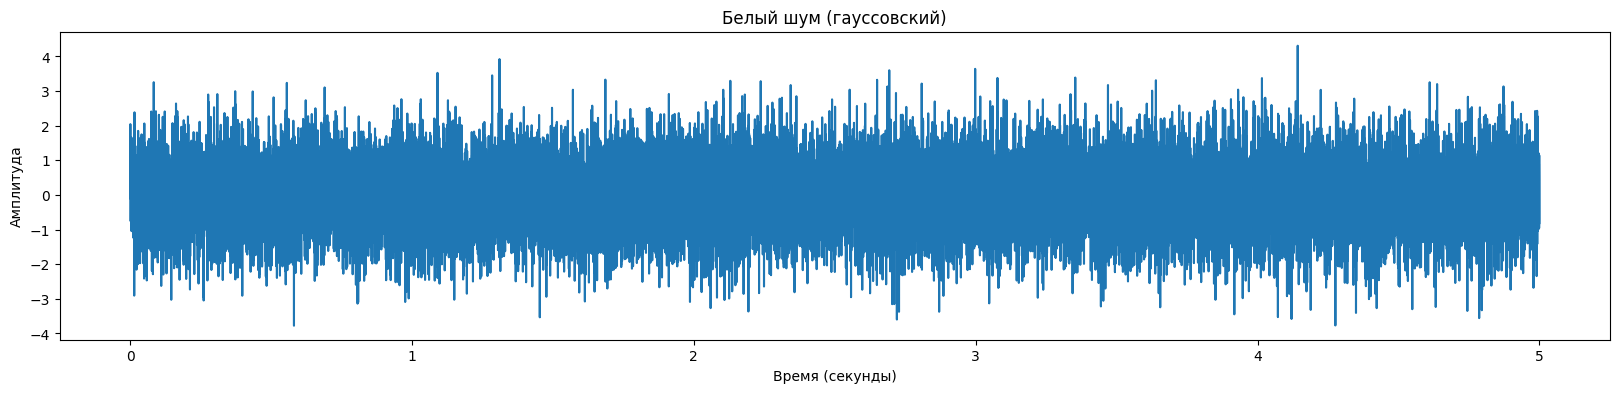

In [14]:
white_noise_g = np.random.normal(loc = 0, scale = 1, size = num_samples)
time_axis = np.linspace(0, duration, len(white_noise_g)) 

plt.figure(figsize=(20, 4))  
plt.plot(time_axis, white_noise_g)
plt.title('Белый шум (гауссовский)')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')
plt.show()

In [107]:
sd.play(white_noise_g, sample_rate)
sd.wait()

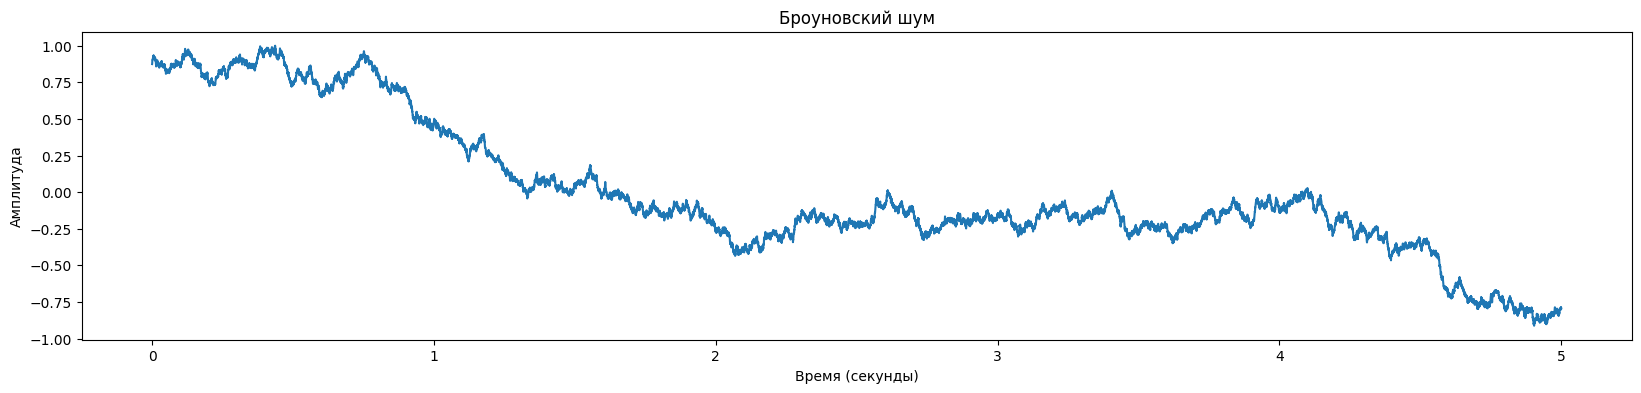

In [27]:
brown_noise = np.cumsum(white_noise_g)
brown_noise -= np.mean(brown_noise)
scale_coeff =  np.max(np.abs(brown_noise))
brown_noise /= scale_coeff

time_axis = np.linspace(0, duration, len(brown_noise)) 

plt.figure(figsize=(20, 4))  
plt.plot(time_axis, brown_noise)
plt.title('Броуновский шум')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')
plt.show()

In [33]:
sd.play(brown_noise, sample_rate)
sd.wait()

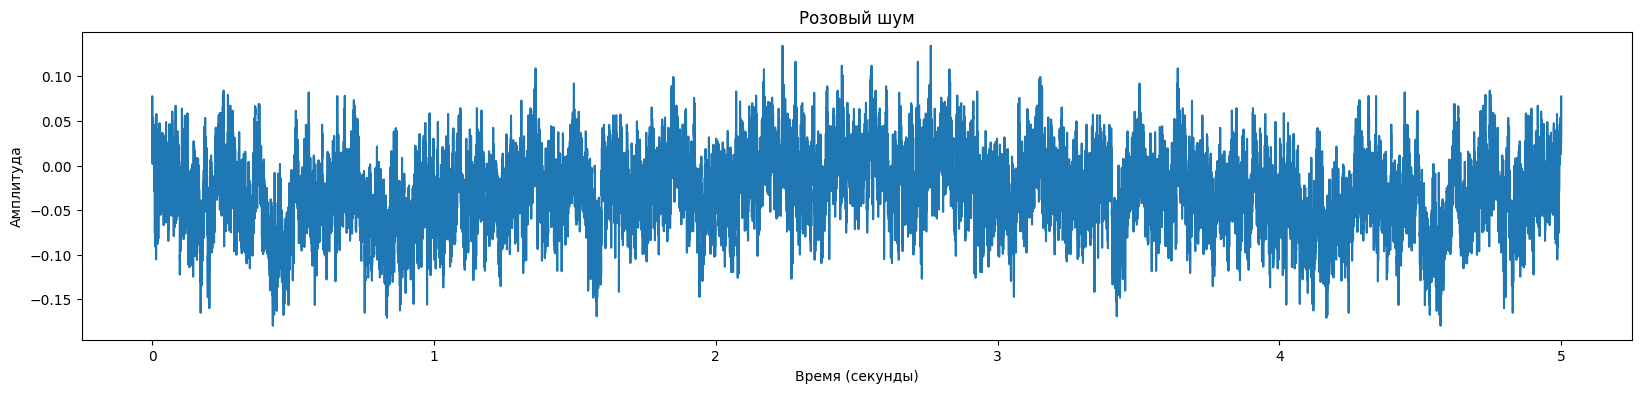

In [138]:
pink_noise = np.fft.rfft(white_noise_g)
pink_noise = np.real(pink_noise / np.sqrt(np.array([(i + 1) / duration for i in range(len(pink_noise))])))
pink_noise = np.fft.irfft(pink_noise)
time_axis = np.linspace(0, duration, len(pink_noise)) 
plt.figure(figsize=(20, 4))  
plt.plot(time_axis, pink_noise)
plt.title('Розовый шум')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')
plt.show()

In [137]:
sd.play(pink_noise, sample_rate)
sd.wait()

In [62]:
import scipy

kb =  scipy.constants.k
h = scipy.constants.physical_constants['Planck constant'][0]
c = scipy.constants.c

T = 17*1/np.power(10, 9)  
G = 10

coef1 = 2*h/(c*c*T*T*T)
coef2 = h/(kb*T)

freq1 = 1000

num_samples_black = int(duration * freq1)

black_noise = np.zeros(num_samples_black)
time_axis = np.arange(num_samples_black) / sample_rate
eq = 10 * np.log(coef1*np.power(freq1,3)/(np.exp(coef2*freq1)-1)) + 10

black_noise = white_noise_g[:len(black_noise)] + eq

black_noise /= np.max(np.abs(black_noise)) 

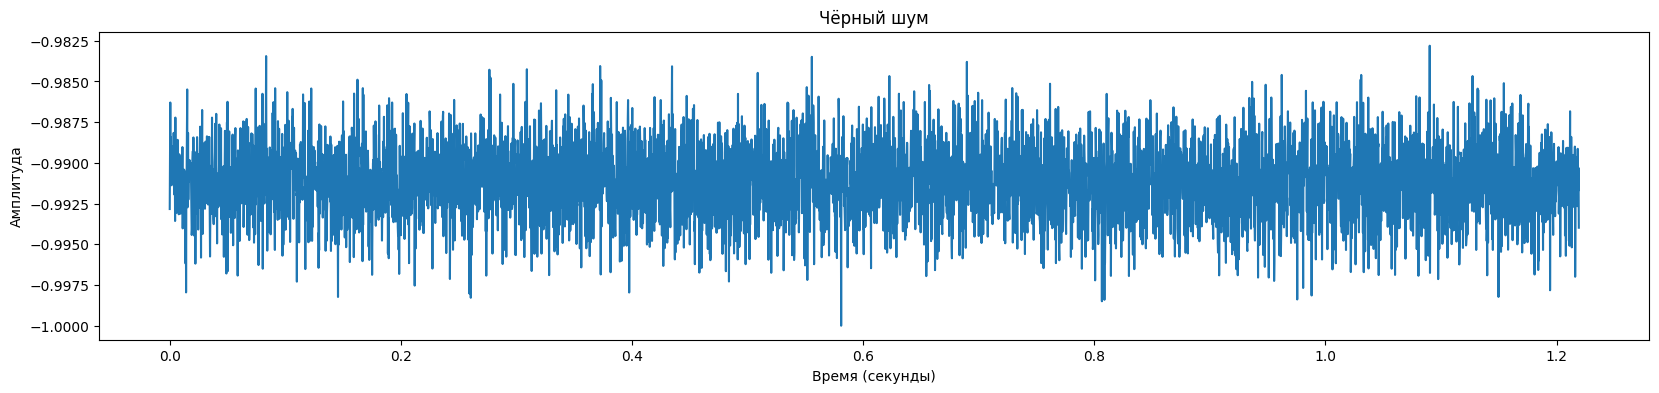

In [63]:
plt.figure(figsize=(20, 4))  
plt.plot(time_axis, black_noise)
plt.title('Чёрный шум')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')
plt.show()

In [66]:
sd.play(black_noise, freq1)
sd.wait()

In [99]:
values = np.array([np.exp(-((i - len(brown_noise) / 2) / len(brown_noise)) ** 2 * 28) for i in range(len(brown_noise))])
values_noise = values + brown_noise

C:\Users\Иван\AppData\Local\Temp\ipykernel_156336\956873414.py:21: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([c0, c1, c2],


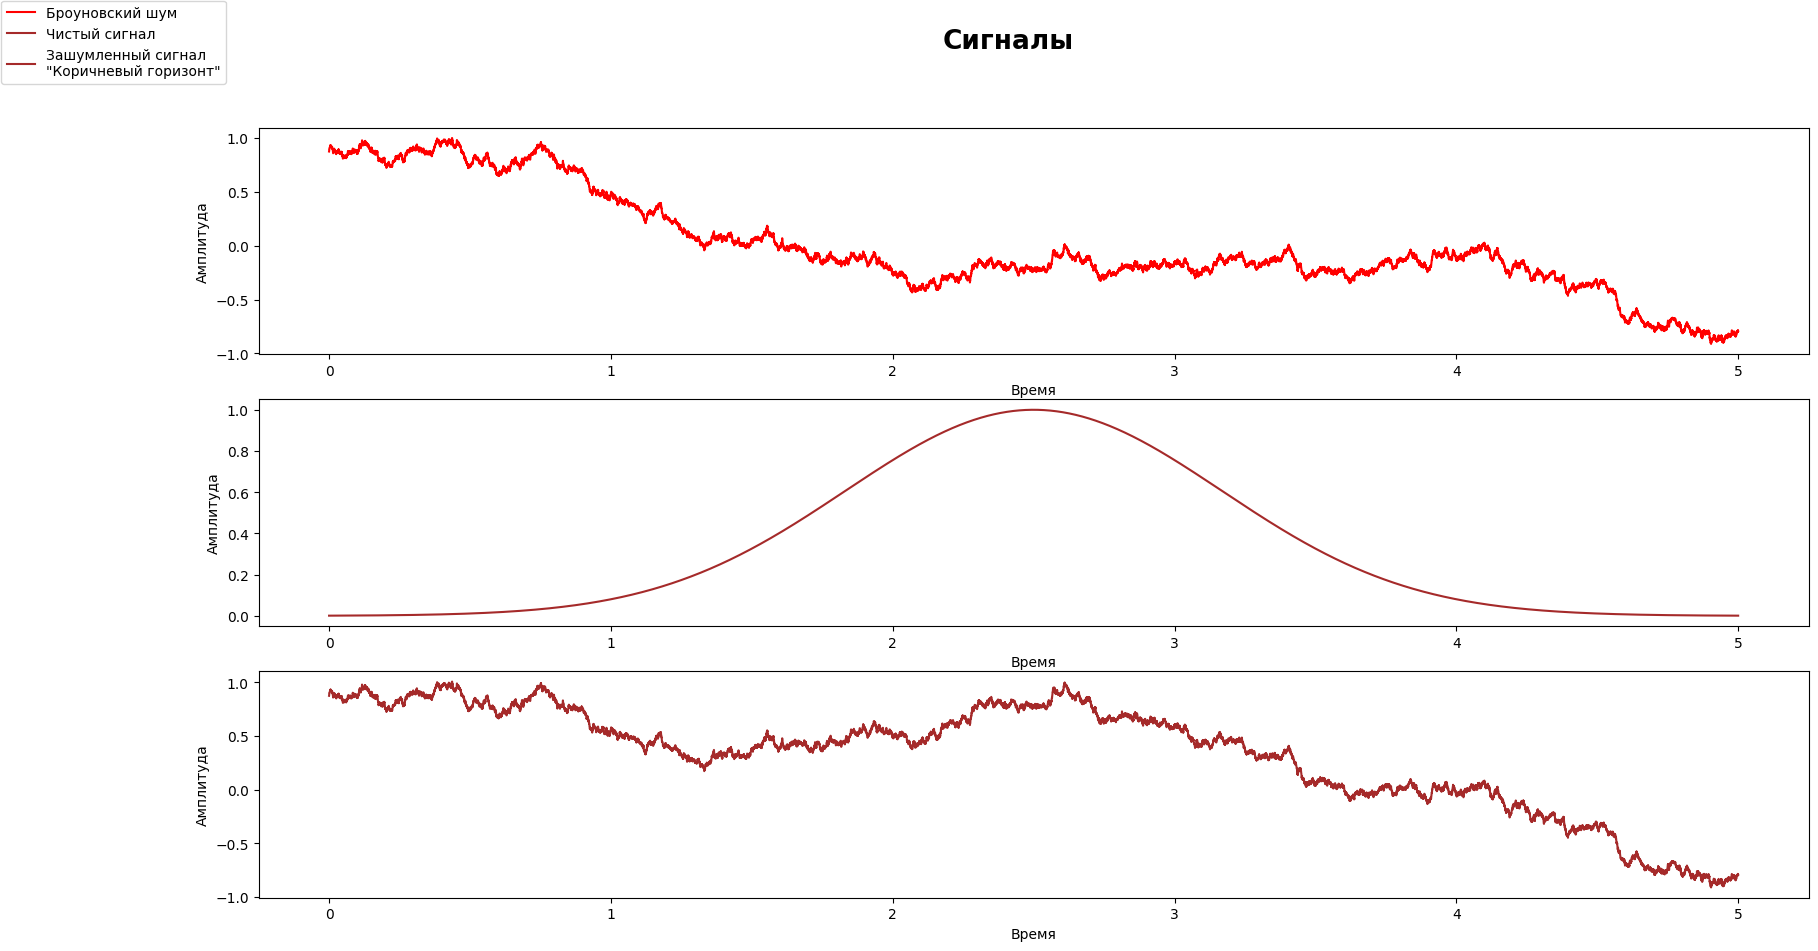

In [114]:
time_points = np.linspace(0, duration, num_samples)

fig, axs = plt.subplots(3, 1, figsize=(20, 10))

fig.suptitle('Сигналы', fontsize=19, fontweight='bold')

labels = ["Броуновский шум", "Чистый сигнал", "Зашумленный сигнал\n\"Коричневый горизонт\""]

c0 = axs[0].plot(time_points, brown_noise, color="red")
axs[0].set_xlabel('Время')
axs[0].set_ylabel('Амплитуда')

c1 = axs[1].plot(time_points, values, color="brown")
axs[1].set_xlabel('Время')
axs[1].set_ylabel('Амплитуда')

c2 = axs[2].plot(time_points, values_noise, color="brown")
axs[2].set_xlabel('Время')
axs[2].set_ylabel('Амплитуда')

fig.legend([c0, c1, c2],
           labels=labels,
           loc='upper left',
           borderaxespad=0.1)